# Handling non-linear data

In this lab, you will explore a few data sets where the dependent and independent variables aren't quite linearly related.

In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot
import sklearn.linear_model

## Saturation-style data

In [4]:
# The file themepark.csv has some data from a theme park. Children were asked to rate their experience on a scale
# from 0-5. This data was compared against the number of hours they spent in the park.
# Create a pandas DataFrame from this data.
themepark = pandas.read_csv('themepark.csv')
themepark

Hours  Enjoyment
0       1          1
1       2          3
2       3          4
3       4          5
4       5          5
5       1          0
6       1          1
7       1          0
8       1          3
9       1          2
10      1          1
11      2          2
12      2          2
13      2          4
14      2          4
15      2          3
16      3          3
17      3          2
18      3          3
19      3          4
20      3          5
21      4          4
22      4          5
23      5          5
24      5          5
25      5          5
26      5          4

In [5]:
# Have a look at the data (e.g. display the head or tail, use describe, etc.)
print themepark.head()
print themepark.tail()
print themepark.describe()

   Hours  Enjoyment
0      1          1
1      2          3
2      3          4
3      4          5
4      5          5
    Hours  Enjoyment
22      4          5
23      5          5
24      5          5
25      5          5
26      5          4
           Hours  Enjoyment
count  27.000000  27.000000
mean    2.740741   3.148148
std     1.456883   1.610153
min     1.000000   0.000000
25%     1.500000   2.000000
50%     3.000000   3.000000
75%     4.000000   4.500000
max     5.000000   5.000000


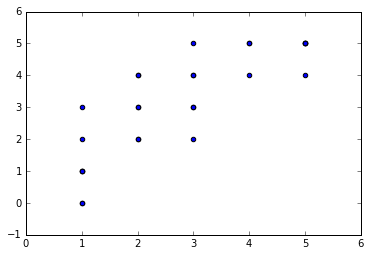

In [6]:
# Draw a scatterplot of this data.
matplotlib.pyplot.scatter(themepark.Hours, themepark.Enjoyment)

In [10]:
# Try doing a linear regression on this data
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(themepark[['Hours']], themepark.Enjoyment)
print linreg.score(themepark[['Hours']], themepark.Enjoyment)
print linreg.coef_

0.673058853898
[ 0.90671141]


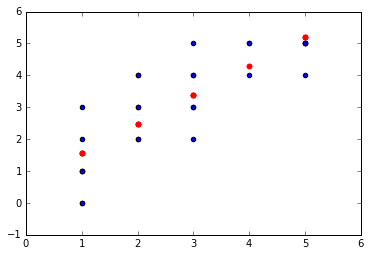

In [11]:
# Plot this regression over the top of the data. Could the regression be better?
linreg_predic = linreg.predict(themepark[['Hours']])
matplotlib.pyplot.scatter(themepark.Hours, themepark.Enjoyment)
matplotlib.pyplot.scatter(themepark.Hours, linreg_predic, color='red')

In [12]:
# Import the python math library so that we can use the function math.log
import math

In [14]:
# The series called "Hours" inside your dataframe has a method called .map() which will apply a function 
# to every element in the series. e.g. df.Hours.map(math.log)
# Use this to add an extra column to your data frame called "LogHours"
themepark['LogHours'] = themepark.Hours.map(math.log)
themepark

Hours  Enjoyment  LogHours
0       1          1  0.000000
1       2          3  0.693147
2       3          4  1.098612
3       4          5  1.386294
4       5          5  1.609438
5       1          0  0.000000
6       1          1  0.000000
7       1          0  0.000000
8       1          3  0.000000
9       1          2  0.000000
10      1          1  0.000000
11      2          2  0.693147
12      2          2  0.693147
13      2          4  0.693147
14      2          4  0.693147
15      2          3  0.693147
16      3          3  1.098612
17      3          2  1.098612
18      3          3  1.098612
19      3          4  1.098612
20      3          5  1.098612
21      4          4  1.386294
22      4          5  1.386294
23      5          5  1.609438
24      5          5  1.609438
25      5          5  1.609438
26      5          4  1.609438

In [15]:
# Try a linear regression of Enjoyment against LogHours
linreg.fit(themepark[['LogHours']], themepark.Enjoyment)
print linreg.score(themepark[['LogHours']], themepark.Enjoyment)
print linreg.coef_

0.722731922532
[ 2.28599658]


In [18]:
# Use your regressors' predict method to predict some Y values based on LogHours
loghours_predic = linreg.predict(themepark[['LogHours']])

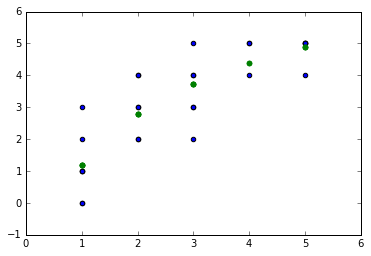

In [102]:
# Create a scatter plot of the original data (i.e. just copy and paste the scatterplot you did before). Overlay
# it with a plot of the new predictions you made (as the y-values) against Hours (not LogHours). This overlay plot
# won't be straight -- it will sag a little on the right.
matplotlib.pyplot.scatter(themepark.Hours, themepark.Enjoyment)
matplotlib.pyplot.scatter(themepark.Hours, loghours_predic, color='green')

# Piece-wise linear data

In [22]:
# windpower.csv shows the total amount of wind power generation capacity in various countries between 2006 and 2015
# The country name is in the first column (and makes a good index); the data is TAB separated, so use sep='\t' as an
# argument when you read it in.
wind = pandas.read_csv('windpower.csv', index_col=0, sep='\t')
wind

2006     2007     2008     2009       2010     2011  \
China                 2599.0   5912.0  12210.0  25104.0  44733.000  62733.0   
Brazil                 237.0    247.0    339.0    606.0    932.000   1509.0   
Sweden                 571.0    831.0   1067.0   1560.0   2163.000   2970.0   
Poland                 153.0    276.0    472.0    725.0   1107.000   1616.0   
Portugal              1716.0   2130.0   2862.0   3535.0   3702.000   4083.0   
Denmark               3140.0   3129.0   3164.0   3465.0   3752.000   3871.0   
Turkey                  65.0    207.0    433.0    801.0   1329.000   1799.0   
Australia              651.0    824.0   1306.0   1712.0   1991.000   2176.0   
Netherlands           1571.0   1759.0   2237.0   2223.0   2237.000   2328.0   
Mexico                  84.0     85.0     85.0    520.0    733.000    873.0   
Japan                 1309.0   1528.0   1880.0   2056.0   2304.000   2501.0   
United States        11603.0  16819.0  25170.0  35159.0  40200.000  46919.0   
Romania                  2.0      7.0     10.0     14.1    462.000    982.0   
Ireland                746.0    805.0   1245.0   1260.0      1.379   1614.0   
Austria                965.0    982.0    995.0    995.0   1011.000   1084.0   
Belgium                194.0    287.0    384.0    563.0    911.000   1078.0   
Greece                 758.0    873.0    990.0   1087.0   1208.000   1629.0   
South Africa             NaN      NaN      NaN      NaN        NaN      NaN   
Finland                 86.0    110.0    143.0    147.0    197.000    199.0   
Chile                    NaN      NaN      NaN     20.0    168.000    172.0   
Uruguay                  NaN      NaN      NaN      NaN        NaN     43.0   
Norway                 325.0    333.0    428.0    431.0    441.000    512.0   
Germany              20622.0  22247.0  23903.0  25777.0  27214.000  29060.0   
South Korea            176.0    192.0    278.0    348.0    379.000    407.0   
Morocco                 64.0    125.0    125.0    253.0    286.000    291.0   
Bulgaria                36.0     70.0    120.0    177.0    500.000    612.0   
Taiwan                 188.0    280.0    358.0    436.0    519.000    564.0   
Zealand New Zealand    171.0    322.0    325.0    497.0    530.000    623.0   
Egypt                  230.0    310.0    390.0    430.0    550.000    550.0   
Ukraine                 86.0     89.0     90.0     94.0     87.000    151.0   
...                      ...      ...      ...      ...        ...      ...   
Croatia                  NaN      NaN     69.4    104.0    152.000    187.4   
Hungary                 61.0     65.0    127.0    201.0    295.000    329.0   
India                 6270.0   7850.0   9587.0  10925.0  13064.000  16084.0   
Ethiopia                 NaN      NaN      NaN      NaN        NaN     23.0   
Estonia                 31.8     59.0     78.0    142.0    149.000    184.0   
Czech Republic          57.0    116.0    150.0    192.0    215.000    217.0   
Argentina                NaN      NaN      NaN      NaN        NaN    113.0   
Panama                   NaN      NaN      NaN      NaN        NaN      NaN   
Costa Rica               NaN      NaN     74.0    123.0    119.000    132.0   
Pakistan                 NaN      NaN      NaN      NaN        NaN      NaN   
Tunisia                  NaN      NaN      NaN      NaN        NaN     54.0   
Thailand                 NaN      NaN      NaN      NaN        NaN      7.0   
Philippines              NaN      NaN      NaN      NaN        NaN      NaN   
Spain                11630.0  15145.0  16740.0  19149.0  20676.000  21674.0   
Nicaragua                NaN      NaN      NaN      NaN        NaN     62.0   
Cyprus                   NaN      NaN      NaN      NaN        NaN      NaN   
Honduras                 NaN      NaN      NaN      NaN        NaN      NaN   
Peru                     NaN      NaN      NaN      NaN        NaN      NaN   
Jordan                   NaN      NaN      NaN      NaN        NaN      Na

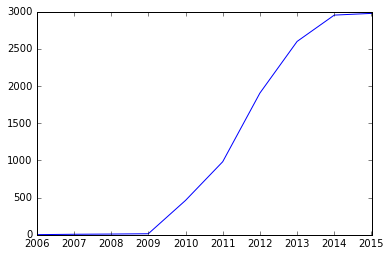

In [103]:
# Plot the wind power generation capacity in Romania
romania = wind.loc['Romania']
romania.plot()

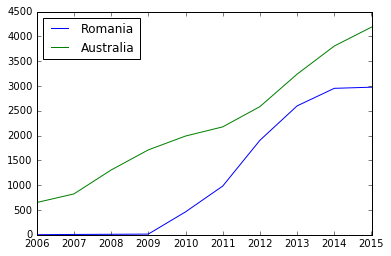

In [104]:
wind.T[['Romania', 'Australia']].plot()

0.896843794716
[ 403.18606061]


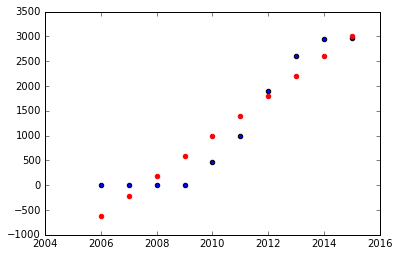

In [60]:
# Try regressing the Romanian data for the whole period.
linreg.fit(pandas.DataFrame(romania.index), romania)
print linreg.score(pandas.DataFrame(romania.index), romania)
print linreg.coef_
wind_predic = linreg.predict(pandas.DataFrame(romania.index))
matplotlib.pyplot.scatter(pandas.DataFrame(romania.index), romania)
matplotlib.pyplot.scatter(pandas.DataFrame(romania.index), wind_predic, color='red')

0.985318902074
[ 629.38571429]


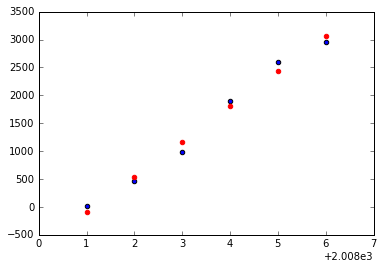

In [66]:
# Try for just 2009 - 2014.
romania_09_14 = wind.loc['Romania','2009':'2014']
df_rom_09_14 = pandas.DataFrame(romania_09_14.index)
linreg.fit(df_rom_09_14, romania_09_14)
print linreg.score(df_rom_09_14, romania_09_14)
print linreg.coef_
rom_year_predic = linreg.predict(df_rom_09_14)
matplotlib.pyplot.scatter(df_rom_09_14, romania_09_14)
matplotlib.pyplot.scatter(df_rom_09_14, rom_year_predic, color='red')

# Other non-linear data

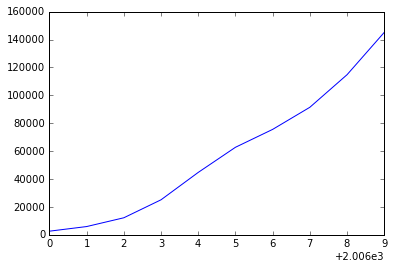

In [68]:
# Plot the wind power generation capacity in China. What do you think you might need to do to the data
china = wind.loc['China']
matplotlib.pyplot.plot(china)
# I think to do a linear regression on this data, it would give better
# results if the years were broken up into three parts.

In [80]:
# Does the Facebook share price show a linear trend, or a faster-than-linear trend? 
# The timeframe from October 2014 to March 2016 is perhaps the clearest.
# If you have time, try to find an effective regression on this data.
import datetime
facebook = pandas.read_csv('facebook-share-price.csv', sep=',', parse_dates=['Date'], index_col='Date')
facebook['Average'] = (facebook.High + facebook.Low)/2.0
facebook

Open        High         Low       Close     Volume  \
Date                                                                    
2016-06-17  114.419998  114.430000  112.559998  113.019997   24383100   
2016-06-16  113.870003  114.500000  112.940002  114.389999   19196100   
2016-06-15  115.300003  115.440002  114.070000  114.599998   19819400   
2016-06-14  114.070000  114.949997  113.580002  114.940002   17618500   
2016-06-13  115.000000  115.480003  113.309998  113.949997   31718200   
2016-06-10  117.540001  118.110001  116.260002  116.620003   18510800   
2016-06-09  118.129997  118.680000  117.709999  118.559998   13859200   
2016-06-08  117.760002  118.599998  117.269997  118.389999   14505600   
2016-06-07  119.239998  119.300003  117.669998  117.760002   17103000   
2016-06-06  118.620003  119.430000  118.360001  118.790001   12744700   
2016-06-03  118.980003  118.980003  117.860001  118.470001   14103300   
2016-06-02  118.690002  119.440002  118.220001  118.930000   13189900   
2016-06-01  118.500000  119.080002  117.820000  118.779999   14986300   
2016-05-31  119.459999  120.099998  118.120003  118.809998   23392800   
2016-05-27  119.559998  119.849998  119.010002  119.379997   13464400   
2016-05-26  118.239998  119.760002  117.919998  119.470001   18191500   
2016-05-25  118.129997  118.669998  117.379997  117.889999   20019800   
2016-05-24  116.239998  117.730003  116.120003  117.699997   20074100   
2016-05-23  117.419998  117.599998  115.940002  115.970001   20367400   
2016-05-20  116.959999  117.989998  116.949997  117.349998   18870600   
2016-05-19  117.050003  117.489998  115.879997  116.809998   20485400   
2016-05-18  116.800003  118.269997  116.730003  117.650002   21571800   
2016-05-17  118.820000  119.010002  117.199997  117.349998   21269700   
2016-05-16  119.379997  119.610001  117.349998  118.669998   31178300   
2016-05-13  120.379997  120.639999  119.680000  119.809998   18047100   
2016-05-12  119.980003  120.839996  118.900002  120.279999   21636600   
2016-05-11  120.410004  121.080002  119.419998  119.519997   21927400   
2016-05-10  119.620003  120.500000  119.000000  120.500000   22803700   
2016-05-09  119.540001  120.279999  118.900002  119.239998   21077100   
2016-05-06  117.160004  119.639999  117.110001  119.489998   26216200   
...                ...         ...         ...         ...        ...   
2012-06-29   31.920000   31.990000   30.760000   31.100000   19526900   
2012-06-28   31.959999   32.189999   30.900000   31.360001   17713300   
2012-06-27   32.459999   32.900002   31.900000   32.230000   28568000   
2012-06-26   32.689999   33.439999   32.500000   33.099998   24858700   
2012-06-25   32.860001   33.020000   31.549999   32.060001   24352900   
2012-06-22   32.410000   33.450001   32.060001   33.049999   74834000   
2012-06-21   31.670000   32.500000   31.510000   31.840000   21875300   
2012-06-20   31.920000   31.930000   31.150000   31.600000   15553600   
2012-06-19   31.540001   32.180000   30.700001   31.910000   30849000   
2012-06-18   29.959999   32.080002   29.410000   31.410000   42978900   
2012-06-15   28.510000   30.100000   28.350000   30.010000   43563800   
2012-06-14   27.650000   28.320000   27.379999   28.290001   16855000   
2012-06-13   27.660000   28.100000   27.100000   27.270000   17102800   
2012-06-12   27.480000   27.770000   26.959999   27.400000   15816800   
2012-06-11   27.180000   28.070000   26.840000   27.010000   28219600   
2012-06-08   26.549999   27.760000   26.440001   27.100000   38034000   
2012-06-07   27.000000   27.350000   26.150000   26.309999   26159500   
2012-06-06   26.070000   27.170000   25.520000   26.809999   61489200   
2012-06-05   26.700001   27.760000   25.750000   25.870001   42473400   
2012-06-04   27.200001   27.650000   26.440001   26.900000   35230300   
2012-06-01   28.889999   29.150000   27.389999   27.719999   41855500   
2012-05-31   28.549999   29.670000   26.830000   29.600000  111639200   
201

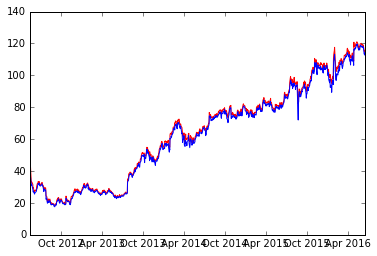

In [81]:
matplotlib.pyplot.plot(facebook.High, color='red')
matplotlib.pyplot.plot(facebook.Low, color='blue')

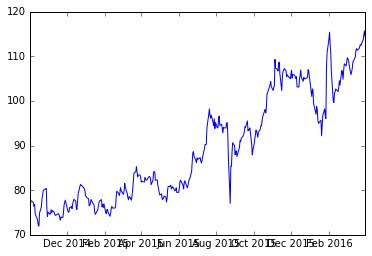

In [108]:
share_values = facebook.loc["2016-03-31":"2014-10-01", "Average"]
matplotlib.pyplot.plot(share_values)

In [109]:
fb_col = pandas.DataFrame(share_values.index)

In [111]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(fb_col, share_values)
#print linreg.score(fb_col, fb_1410_1603_avg)
print linreg.coef_
fb_predic = linreg.predict(fb_col)
matplotlib.pyplot.scatter(fb_col, share_values)
matplotlib.pyplot.scatter(fb_col, fb_predic, color='red')

[  8.25809276e-16]


TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'